# How COVID-19 affect internet companies? 
## Project for data science workshop
- Author: Leo Yang

## Introduction:
- background: 
covid-19 started in January. 
People started going home in March. This affected internet companies a lot.
- goal: 
Did covid-19 help or harm internet companies
- data: 
New York times and Yahoo finance

Note: you may need to restart the kernel to use updated packages.
            cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0


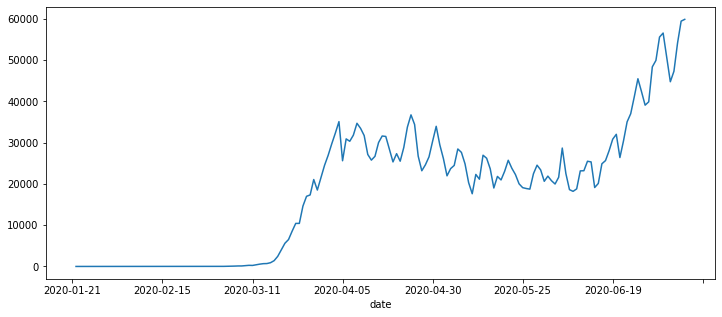

In [5]:
import pandas as pd
%pip install pandas_datareader
import pandas_datareader as pdr
import matplotlib.pyplot as plt
df=pd.read_csv('us.csv',index_col=['date'])
print(df.head())
df["cases"].diff().plot(figsize=(12,5))


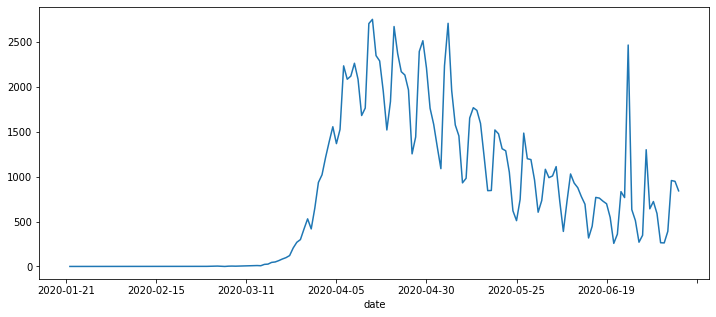

In [3]:
df["deaths"].diff().plot(figsize=(12,5))

In [3]:
df=df.diff()

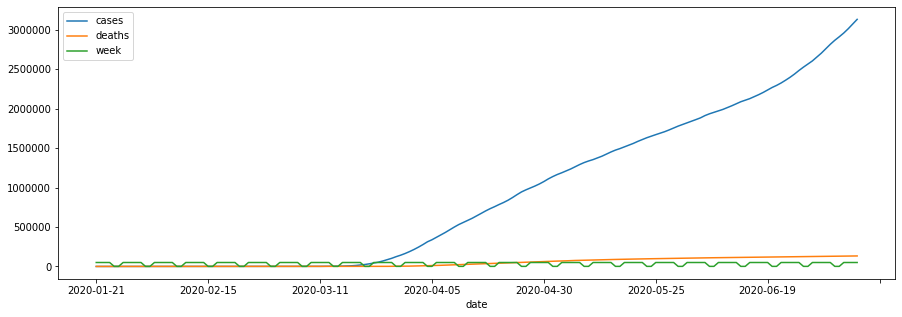

In [4]:
#make sure it start on Sunday for 7, otherwise change it.
flag=2  #1-5 for weekdays, 6-7 for weekends
t_range=pd.date_range('2020-01-21','2020-06-19')
weekdays = 50000
weekends = 1000

t_range = df.index
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot(figsize=(15,5))

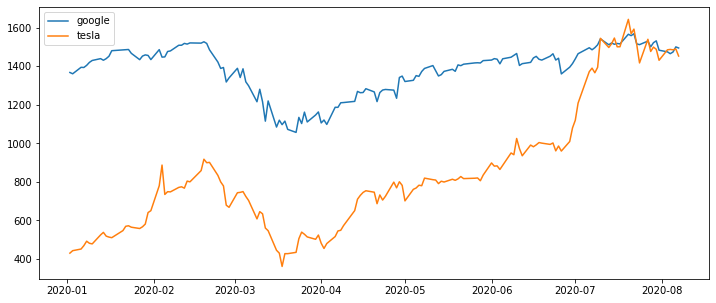

In [10]:
big_companies_names =['google','tesla']
big_companies_codes = ['GOOG','TSLA']

sample_names = big_companies_names
sample_codes = big_companies_codes

m=len(sample_names)
dfs=[]
for i in range(m):
    dfs.append(pdr.get_data_yahoo(sample_codes[i]))
plt.figure(figsize=(12,5))
for i in range(m):  
    plt.plot(dfs[i][dfs[i].index>'2020-01-01']['Close'],label=sample_names[i])
plt.legend()

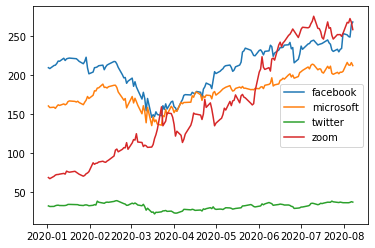

In [8]:
small_companies_names = ['facebook','microsoft','twitter','zoom']
small_companies_codes = ['FB','MSFT','TWTR','ZM']

dsf=[]
n=len(small_companies_names)
for i in range(n):
    dsf.append(pdr.get_data_yahoo(small_companies_codes[i]))
for i in range(n):  
    plt.plot(dsf[i][dsf[i].index>'2020-01-01']['Close'],label=small_companies_names[i])
plt.legend()